In [16]:
import cv2
import pytesseract


In [17]:
import matplotlib.pyplot as plt 

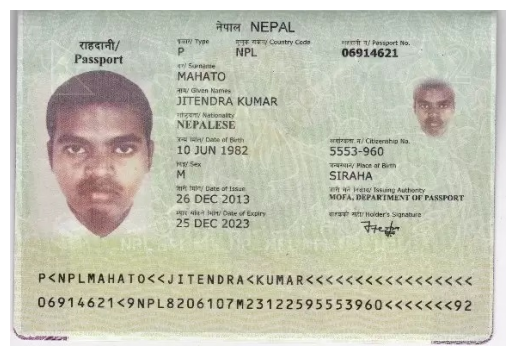

In [26]:
image = cv2.imread('E:\\Computer-Vision\\OCR_project\\sample-photo\\nepali-passport-1.jpg')
# displaying image using matplotlib
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

In [27]:
# convert to grayscale image
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

# apply blurring to reduce noises
blur_image = cv2.GaussianBlur(gray_image, ksize = (3,3), sigmaX= 0)

# apply adaptive threshold
adpt_thresh_image = cv2.adaptiveThreshold(blur_image, maxValue= 255, adaptiveMethod= cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType= cv2.THRESH_BINARY_INV, blockSize= 21, C = 4)

In [28]:
contour, _ = cv2.findContours(adpt_thresh_image, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

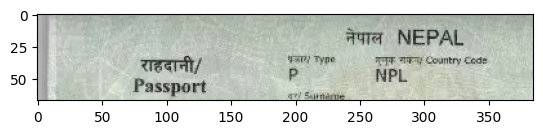

In [29]:
for cont in contour:
    largest_contour = None
    largest_area = 0
    area = cv2.contourArea(cont)
    if area > largest_area:
        largest_contour = cont
        largest_area = cv2.contourArea(cont)
    
x, y, w, h = cv2.boundingRect(largest_contour)
image_after_contour = rgb_image[x: x + w, y: y+ h]

plt.imshow(image_after_contour)
plt.show()



In [30]:
gray_contour_id = cv2.cvtColor(image_after_contour, cv2.COLOR_RGB2GRAY)

In [32]:
custom_config = r'--oem 3 --psm 3 -l eng+osd --tessdata-dir "C:\\Program Files\\Tesseract-OCR\\tessdata" -c tessedit_char_whitelist=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
text = pytesseract.image_to_string(gray_contour_id, config=custom_config)
print(text)

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.